<a href="https://colab.research.google.com/github/MalihaUCF/Machine-Learning-Course-Assignments-Spring-2019/blob/master/Assignment%202/Model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading CIFAR-10 dataset

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
import keras


#creating train,validate and test sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.20,stratify=train_labels)#, random_state=42)

print(train_images.shape)
print(X_train.shape)
print(X_val.shape)
print(test_images.shape)


#train_images=np.array(train_images)
#x_train=train_images[0:40000]
#x_val=train_images[40000:]

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)



num_classes=10
# Convert class vectors to binary class matrices.
test_labels = keras.utils.to_categorical(test_labels, num_classes)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val=keras.utils.to_categorical(y_val, num_classes)
print(y_val.shape)




(50000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000, 1)
(10000, 10)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Using real-time data augmentation.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
625/625 [==============================] - 38s 61ms/step - loss: 1.9935 - acc: 0.4027 - val_loss: 1.4720 - val_acc: 0.5409
Epoch 2/30
625/625 [==============================] - 34s 55ms/step - loss: 1.3494 - acc: 0.5692 - val_loss: 1.1212 - val_acc: 0.6522
Epoch 3/30
625/625 [==============================] - 34s 54ms/step - loss: 1.1546 - acc: 0.6323 - val_loss: 0.9790 - val_acc: 0.6942
Epoch 4/30
625/625 [==============================] - 33s 52ms/step - loss: 1.0512 - acc: 0.6629 - val_loss: 1.0143 - val_acc: 0.6880
Epoch 5/30
625/625 [==============================] - 34s 55ms/step - loss: 0.9635 - acc: 0.6967 - val_loss: 0.8242 - val_acc: 0.7464
Epoch 6/30
625/625 [==============================] - 34s 54ms/step - loss: 0.9209 - acc: 0.7136 - val_loss: 0.8147 - val_acc: 0.758

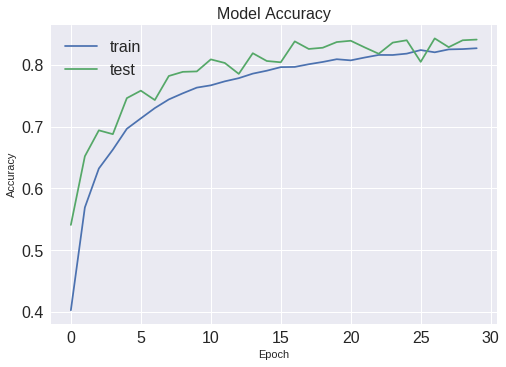

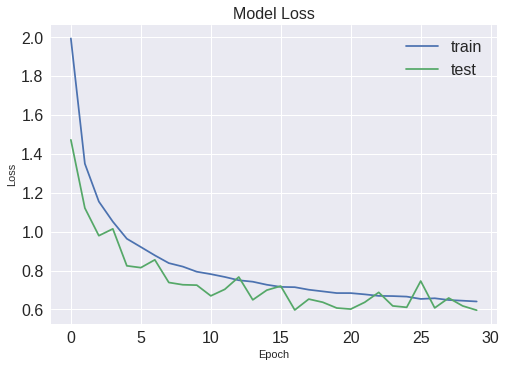

Confusion Matrix


[[889  31  20   7   3   2   9  10  15  14]
 [  2 973   1   0   0   1   5   0   0  18]
 [ 50   6 748  15  28  32  91  22   3   5]
 [ 28  13  30 595  28 134 124  28   9  11]
 [ 16   1  36  15 769  10 117  35   1   0]
 [  6   6  21  87  27 749  53  43   1   7]
 [  5   5  11  15   2   3 950   6   2   1]
 [ 15   2  11  12  21  13  19 902   1   4]
 [ 58  50   2   2   0   1   8   0 857  22]
 [ 11  75   1   4   1   1   4   2   6 895]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1080
           1       0.97      0.84      0.90      1162
           2       0.75      0.85      0.80       881
           3       0.59      0.79      0.68       752
           4       0.77      0.87      0.82       879
           5       0.75      0.79      0.77       946
           6       0.95      0.69      0.80      1380
           7       0.90      0.86      0.88      1048
           8       0.86      0.96      0.90       895
         

In [3]:
batch_size = 64
epochs = 30
data_augmentation = True
num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
#model_name = 'keras_cifar10_trained_model.h5'



from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler


#Model with 2 conv blocks and 4 conv layers with 2 fc layers and dropout
def model1():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model


#increased number of blocks/layers
def model2():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1024))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model

#no dropout
def model3():
  

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model



#more filters , rest same as model 1
def model4():
  

  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same',
                   input_shape=X_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  
  
  return model

#with batch normalization, and weight regulariser
def model5():
  
  weight_decay = 1e-4
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))

  model.add(Flatten())
  model.add(Dense(num_classes, activation='softmax'))
  
  return model
  
 
#to vary learning during training
def lr_schedule(epoch):
  lrate = 0.001
  if epoch > 75:
      lrate = 0.0005
  if epoch > 100:
      lrate = 0.0003
  return lrate
  


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# using SGD
sgd=keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

#using ADAM
Adam=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


#using adgrad
adagrad=keras.optimizers.Adagrad(lr=0.001, epsilon=None, decay=0.0)


#use mse as loss as well categorical_crossentropy


#Calling model5
model=model5()

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


#taking mean and normalising
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_val=(X_val-mean)/(std+1e-7)
test_images=(test_images-mean)/(std+1e-7)


# option of data augmentation 
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True,callbacks=[LearningRateScheduler(lr_schedule)])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
    
    datagen.fit(X_train)

    

    # Fit the model on the batches generated by datagen.flow().
    history=model.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,steps_per_epoch=len(X_train)/batch_size,
                        validation_data=(X_val, y_val),callbacks=[LearningRateScheduler(lr_schedule)])
                        


# Score trained model.
scores = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys(),'\n\n\n')



SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print('\n\n')

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


#finding confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
import os
from keras.models import load_model


y_pred=model.predict(test_images) 
y_pred = [np.argmax(entry) for entry in y_pred]
y_true = [np.argmax(entry) for entry in test_labels]

print('Confusion Matrix\n\n')
print(confusion_matrix(y_true, y_pred))  

print(classification_report(y_pred,y_true))

In [0]:
#Saving the model as an h5 file

good_model='model5_hold_out.h5'
model.save(good_model)

In [0]:
!ls

sample_data


In [0]:
from google.colab import files

with open(good_model, 'r') as f:
  files.download(good_model)